In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b, num_examples):
    """生成 y = Xw + b + 噪声。"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([1.2031, 0.0872]) 
label: tensor([6.2955])


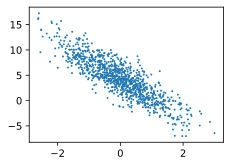

In [4]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(),
                labels.detach().numpy(), 1);

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.1079,  0.6965],
        [ 1.1177, -0.5142],
        [-0.5123,  0.6991],
        [ 0.1010,  1.0268],
        [-0.9615, -0.1265],
        [-0.6992,  0.4604],
        [-1.7513, -1.0297],
        [-0.3315, -0.1275],
        [-0.0867,  0.0351],
        [ 0.6077,  0.8142]]) 
 tensor([[-0.3804],
        [ 8.1804],
        [ 0.8008],
        [ 0.9128],
        [ 2.7148],
        [ 1.2302],
        [ 4.1948],
        [ 3.9786],
        [ 3.8892],
        [ 2.6440]])


In [6]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [7]:
def linreg(X, w, b):  
    """线性回归模型。"""
    return torch.matmul(X, w) + b

In [8]:
def squared_loss(y_hat, y):  
    """均方损失。"""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [9]:
def sgd(params, lr, batch_size):  
    """小批量随机梯度下降。"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [12]:
lr = 0.03
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000057
epoch 2, loss 0.000057
epoch 3, loss 0.000057
epoch 4, loss 0.000057
epoch 5, loss 0.000057
epoch 6, loss 0.000057
epoch 7, loss 0.000057
epoch 8, loss 0.000057
epoch 9, loss 0.000057
epoch 10, loss 0.000057


In [11]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-0.0006, -0.0007], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0006], grad_fn=<RsubBackward1>)
